## Competição DSA de Machine Learning - Edição Junho/2019
# MARCIO DE LIMA

# As submissões para esta competição serão avaliadas pelo RMSE (Root Mean Squared Error).
# 

In [ ]:
# Nesta competição, você desenvolverá algoritmos para identificar e atender as oportunidades mais relevantes 
# para os indivíduos, revelando sinais de lealdade dos clientes. Sua contribuição melhorará a vida dos 
# clientes e ajudará a reduzir as campanhas indesejadas, a fim de criar uma e experiência mais personalizada 
# para cada cliente e consequentemente aumentar a satisfação e claro, as vendas.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [54]:
# Carregando os arquivos
df = pd.read_csv('data/dataset_treino.csv')
df_teste = pd.read_csv('data/dataset_teste.csv')

df.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
# Mostrando as estruturas dos Datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [5]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [41]:
#Limpando espaços do texto caso existam
df['first_active_month'] = df['first_active_month'].str.strip()
df_teste['first_active_month'] = df_teste['first_active_month'].str.strip()


In [55]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]
df_teste.isna().any()[lambda x: x]

Series([], dtype: bool)

In [56]:
# Ajustando colunas e limpeza dos dados nos DataSets

#Criando novas colunas
df['Month'] = df.first_active_month.apply(lambda dt: dt[5:7])
df['Year'] = df.first_active_month.apply(lambda dt: dt[:4])
df_teste['Month'] = df_teste.first_active_month.apply(lambda dt: dt[5:7])
df_teste['Year'] = df_teste.first_active_month.apply(lambda dt: dt[:4])

#Ajustando a tipagem da coluna
df['Month'] = df['Month'].apply(pd.to_numeric, downcast='integer')
df['Year'] = df['Year'].apply(pd.to_numeric, downcast='integer')
df_teste['Month'] = df['Month'].apply(pd.to_numeric, downcast='integer')
df_teste['Year'] = df['Year'].apply(pd.to_numeric, downcast='integer')

df.dtypes

first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
Month                   int64
Year                    int64
dtype: object

In [65]:
# Criando coluna = calculo das features
df['feature_4'] = (df['feature_1'] * df['feature_1'].mean()) + (df['feature_2']  * df['feature_2'].mean()) + (df['feature_3'] * df['feature_3'].mean())
df_teste['feature_4'] = (df_teste['feature_1'] * df_teste['feature_1'].mean()) + (df_teste['feature_2']  * df_teste['feature_2'].mean()) + (df_teste['feature_3'] * df_teste['feature_3'].mean())
df.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,Month,Year,feature_4
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,6,2017,19.582942
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,1,2017,14.166653
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,8,2016,9.701442
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,9,2017,17.657473
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,11,2017,8.341541


In [66]:
# Correlação com a Variavel TARGET
df[df.columns.drop('target')].corrwith(df.target)


feature_1   -0.014251
feature_2   -0.006242
feature_3   -0.008125
Month        0.031512
Year         0.040341
feature_4   -0.016069
dtype: float64

In [68]:
# Dados estatisticos
df.describe()

,feature_1,feature_2,feature_3,target,Month,Year,feature_4
count,201917.000000,201917.000000,201917.000000,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636,7.378745,2016.509298,13.009279
std,1.186160,0.751362,0.495683,3.850500,3.340718,0.788199,3.917852
min,1.000000,1.000000,0.000000,-33.219281,1.000000,2011.000000,4.850721
25%,2.000000,1.000000,0.000000,-0.883110,5.000000,2016.000000,9.701442
50%,3.000000,2.000000,1.000000,-0.023437,8.000000,2017.000000,13.372321
75%,4.000000,2.000000,1.000000,0.765453,10.000000,2017.000000,15.912063
max,5.000000,3.000000,1.000000,17.965068,12.000000,2018.000000,19.582942


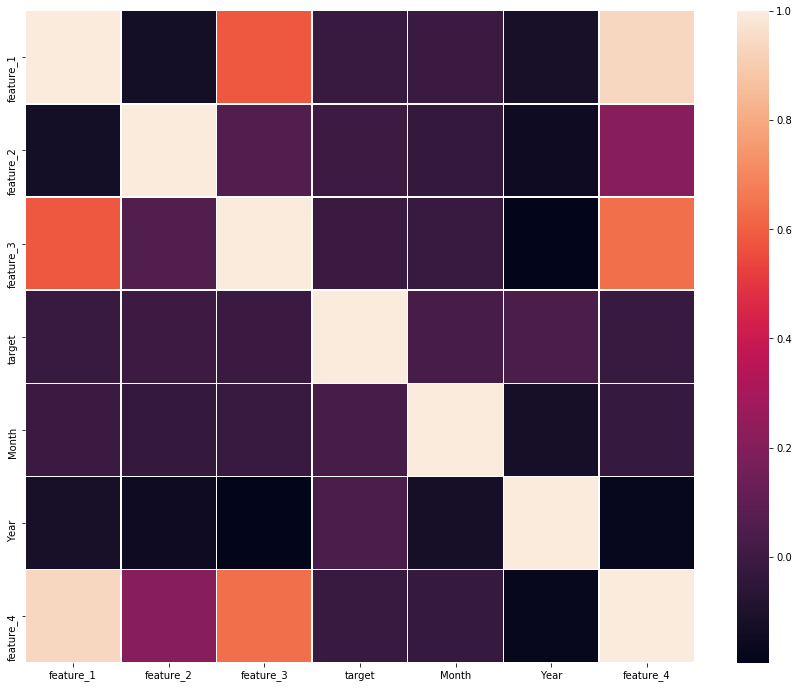

In [69]:
#Construindo um gráfico de HEATMAP
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(),linewidths=.5, ax=ax)

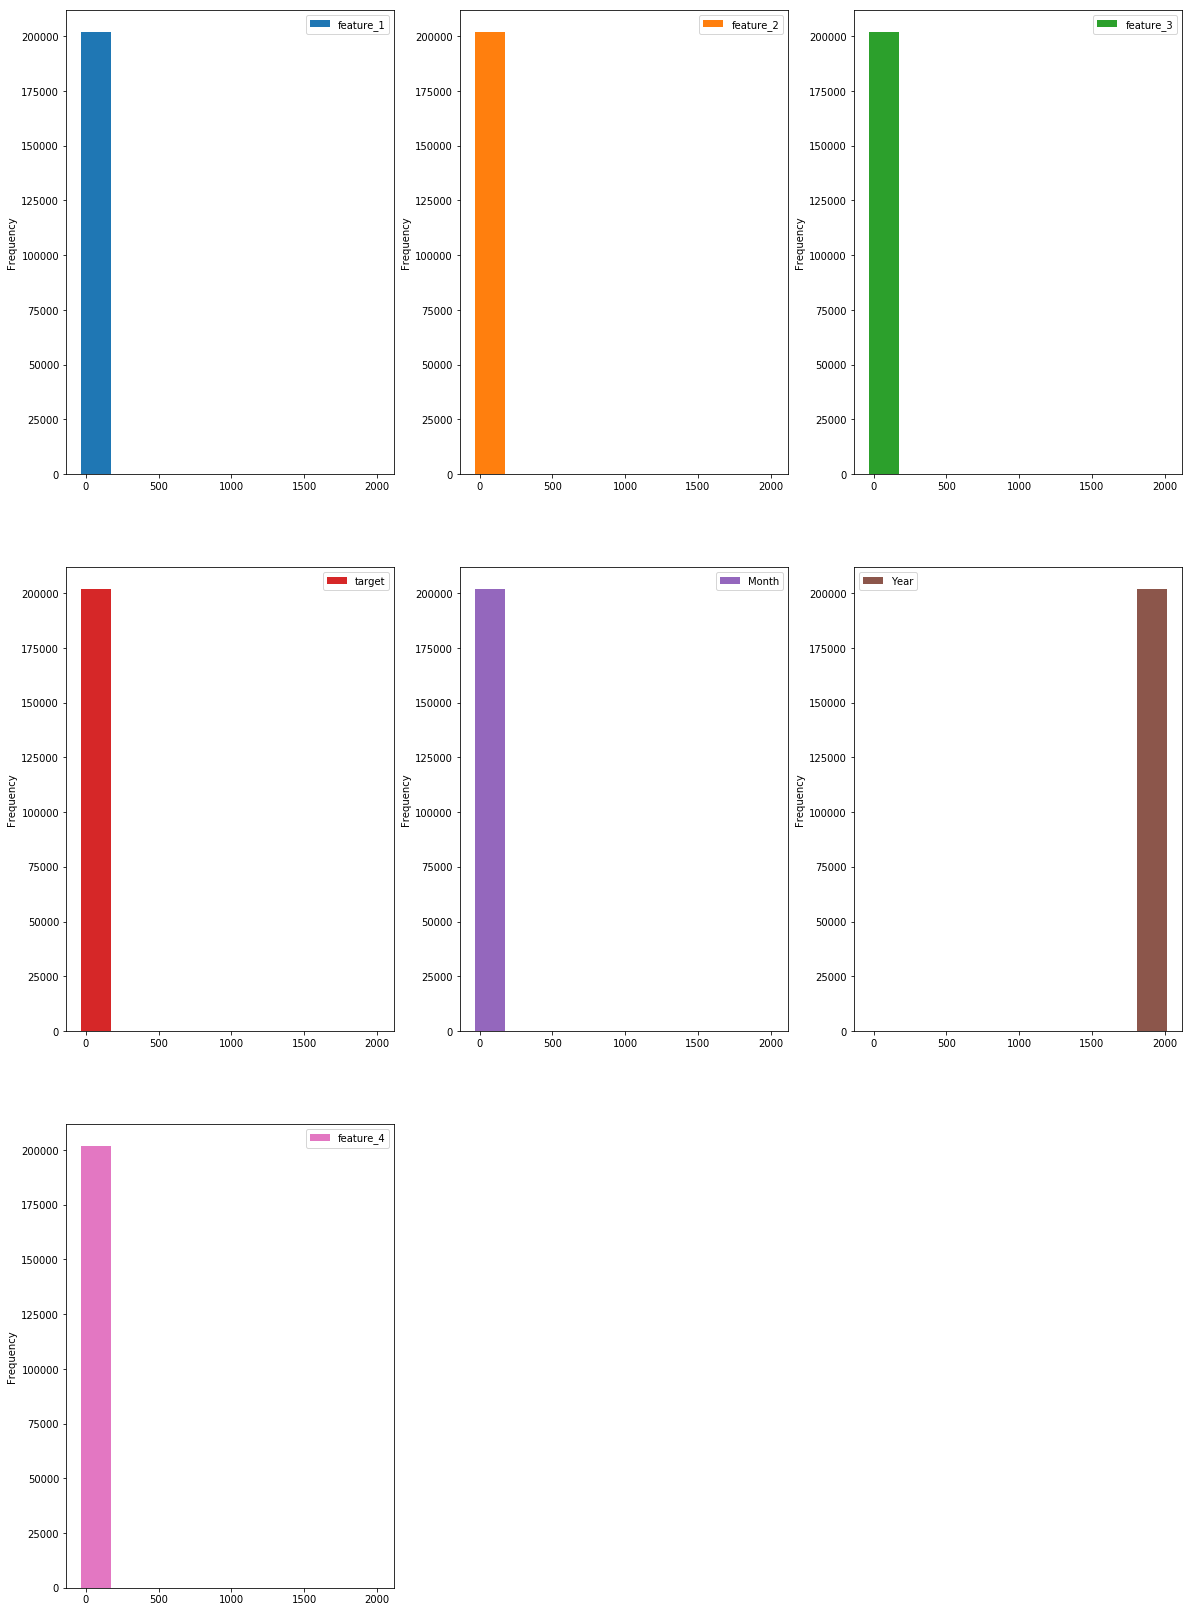

In [76]:
#Gerando gráficos para analise das variaveis

#Histogramas
df.plot(kind = 'hist', subplots = True, layout = (7,3), sharex = False, figsize=(20,70))
plt.show()

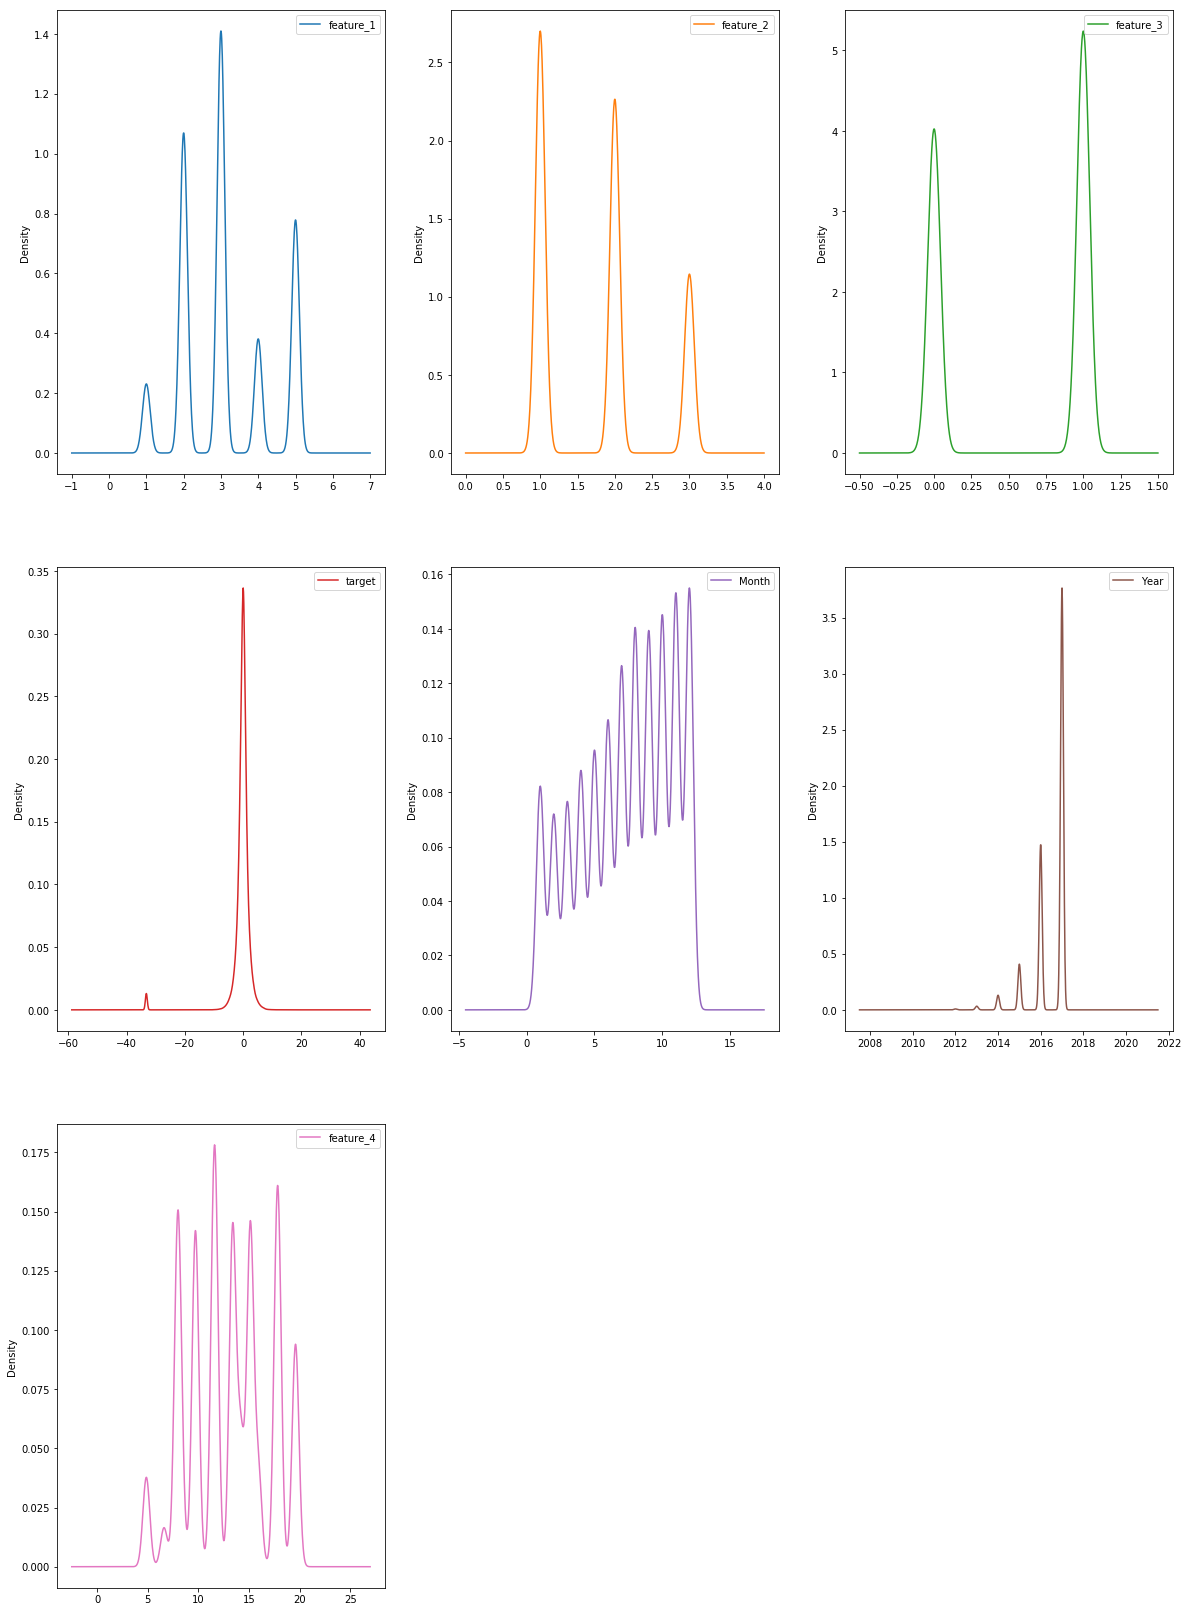

In [78]:
df.plot(kind = 'density', subplots = True, layout = (7,3), sharex = False, figsize=(20,70))
plt.show()

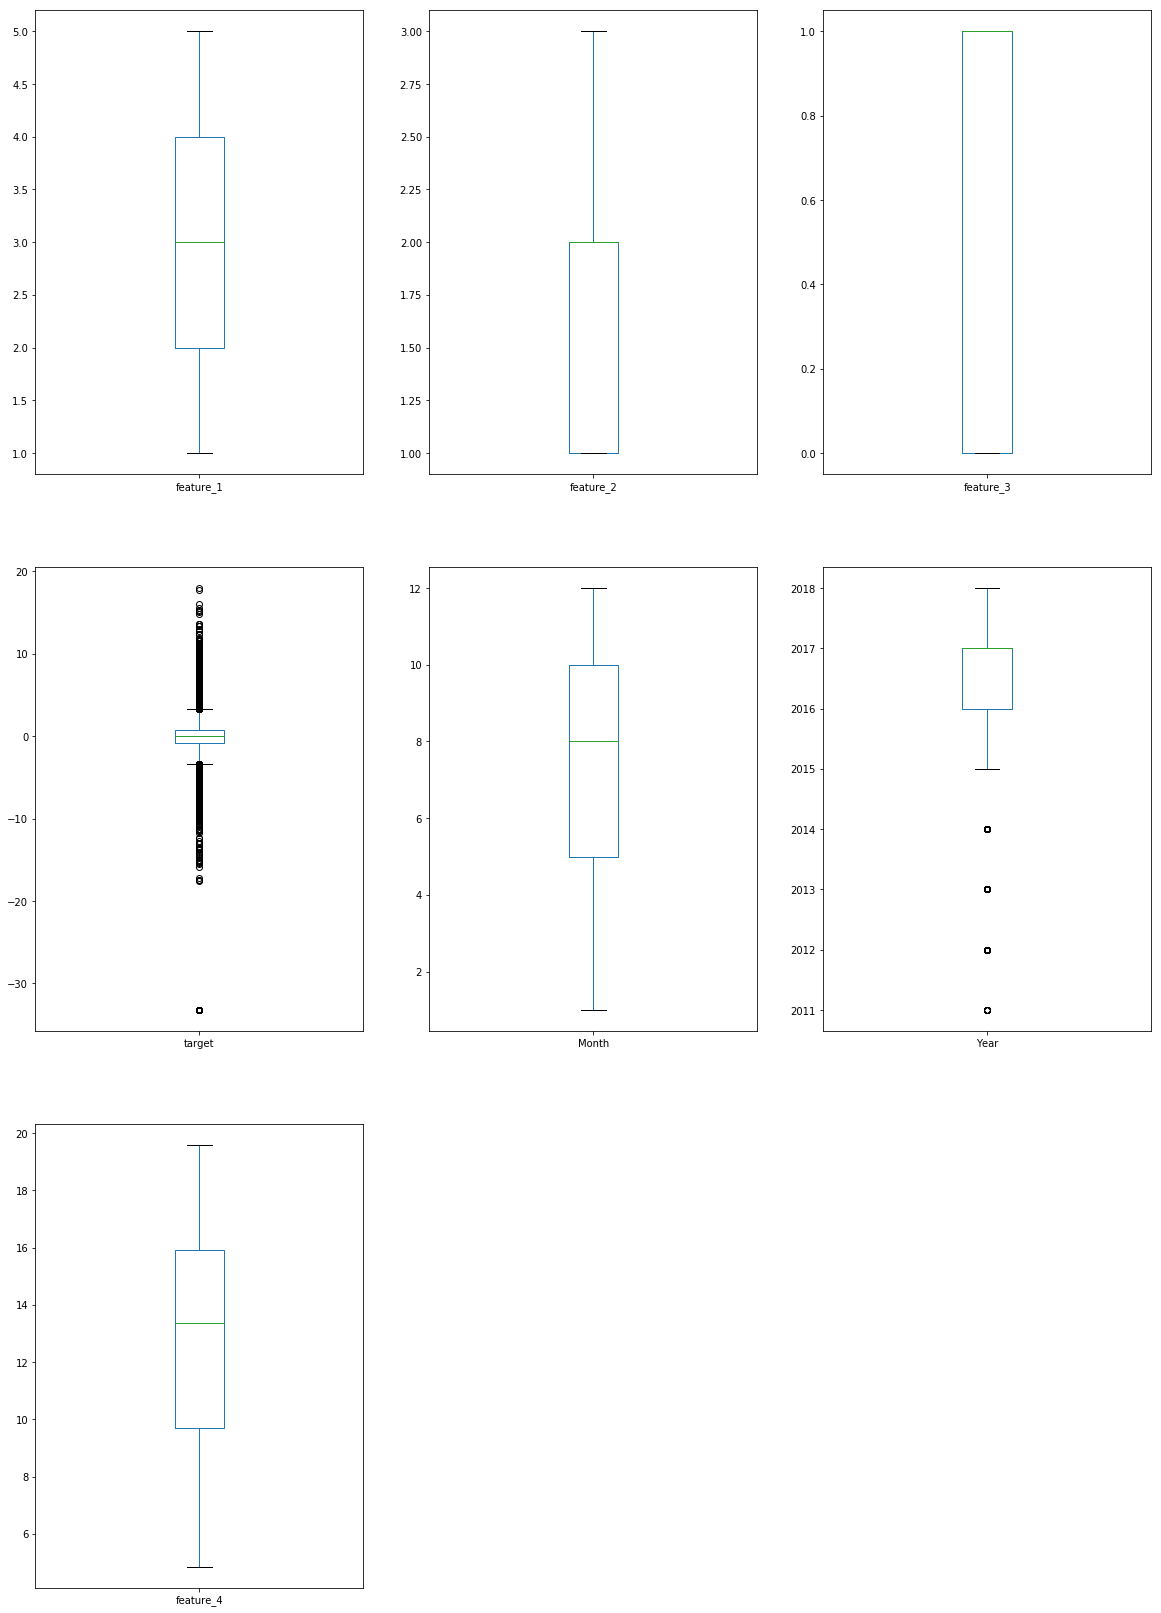

In [80]:
df.plot(kind = 'box', subplots = True, layout = (7,3), sharex = False, sharey = False, figsize=(20,70))
plt.show()

In [142]:
#Funcoes utilitárias para medir a performance dos modelos
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmspe(y_test, y_pred):

    mse = mean_squared_error(y_test, y_pred)
    rmspe = sqrt(mse)   
    
    return rmspe

# Treinamento e resultado do modelo - funcao generica
def treine_e_avalie(model, X, y, X_test, y_test):
    
    
    # Predicao
    model_pred = treino_e_predicao(model, X, y, X_test)
    #Performance
    model_rmspe = rmspe(y_test, model_pred)
    
    # Retorno da Performance do modelo
    return model_rmspe

def treino_e_predicao(model, X, y, X_test):
    
    # FIT
    model.fit(X, y)
    # Predicao
    return model.predict(X_test)

In [85]:
df.shape

(201917, 9)

In [88]:
#Gerando dados de Treino e de Teste para os modelos
from sklearn.model_selection import train_test_split

seed = 1313

array = df.values
X = array[:,6:9]
Y = df.target.values

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.30, random_state = seed)


In [96]:
X_treino

array([[12, 2017, 6.596131083564039],
       [1, 2017, 13.372321300336276],
       [10, 2017, 11.62691105751373],
       ...,
       [8, 2015, 15.117731543158822],
       [12, 2016, 17.837532253351625],
       [12, 2016, 8.341541326386585]], dtype=object)

In [91]:
# Importando os modelos

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [102]:
# Modelo 1 - Regressao Linear Simples

lr = LinearRegression()
lr_rmspe = treine_e_avalie(lr, X_treino, y_treino, X_teste, y_teste)

print('Modelo 1 - Regressao Linear => RMSPE = %0.4f' % lr_rmspe)

Modelo 1 - Regressao Linear => RMSPE = 3.8569


In [106]:
# Modelo 2 - KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn_rmspe = treine_e_avalie(knn, X_treino, y_treino, X_teste, y_teste)

print('Modelo 2 - KNN => RMSPE = %0.4f' % knn_rmspe)

Modelo 2 - KNN => RMSPE = 4.3201


In [143]:
# Modelo 3 - GradientBoostingRegressor
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_rmspe = treine_e_avalie(gradient_boosted, X_treino, y_treino, X_teste, y_teste)

print('Modelo 3 - GradientBoostingRegressor = %0.4f' % gradient_boosted_rmspe)


Modelo 3 - GradientBoostingRegressor = 3.8544


## Melhor modelo - GradientBoostingRegressor - 3.8544

In [171]:
# Otimizando o modelo 3 - Otimização de Hyperparâmetro
from sklearn.model_selection import RandomizedSearchCV

#Modelo para testar a otimização
gbr = GradientBoostingRegressor(random_state=13)
#Parametros da otimização
param_grid = {
        'n_estimators': [100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_depth': [2, 3, 5, 10, 15],
        'learning_rate': [0.1],
        'loss': ['ls', 'lad', 'huber'],
        'subsample': [1]
}

#Modelo para melhor scoring para o RMSE
modelo_otm = RandomizedSearchCV(estimator=gbr,
                               param_distributions=param_grid,
                               cv=2, n_iter=1, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=60)


In [172]:
#Treinando o modelo otimizado
modelo_otm.fit(X_treino, y_treino)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   10.5s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=13, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=1, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.1], 'loss': ['ls', 'lad', 'huber'], 'subsample': [1]},
          pre_dispatch='2*n_jobs', random_state=60, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [173]:
#Resultado do modelo otimizado
print('Melhores Params:')
print(modelo_otm.best_params_)
print('Melhor CV Score:')
print(-modelo_otm.best_score_)

Melhores Params:
{'subsample': 1, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 2, 'loss': 'lad', 'learning_rate': 0.1}
Melhor CV Score:
1.5433707250438624


In [203]:
# Modelo 4 - GradientBoostingRegressor Otimizado
# Melhores parameters
#gradient_boosted1_otm = GradientBoostingRegressor(max_depth=2, max_features='sqrt',
#                                                  n_estimators=500, loss='lad', random_state=60, 
#                                                  learning_rate=0.1, verbose=1, subsample=1)

gradient_boosted1_otm = GradientBoostingRegressor( max_depth=3, max_features='sqrt', 
                                                   n_estimators=100, 
                                                   criterion='mse',
                                                   learning_rate=0.05,
                                                   random_state=60)

modelo_pred_otm = treino_e_predicao(gradient_boosted1_otm, X_treino, y_treino, X_teste)
gradient_boosted_rmspe_otm = rmspe(y_teste, modelo_pred_otm)

print('Modelo 4 - GradientBoostingRegressor - Otimizado = %0.4f' % gradient_boosted_rmspe_otm)


Modelo 4 - GradientBoostingRegressor - Otimizado = 3.8540


In [212]:
#Gerando os dados para o Arquivo de submissao
array = df_teste.values
X_teste1 = array[:,5:9]


In [215]:
X_teste1

array([[6, 2017, 15.117542852058275],
       [1, 2017, 11.443906069258958],
       [8, 2016, 17.852470818537],
       ...,
       [6, 2017, 17.852470818537],
       [9, 2017, 7.960314828146866],
       [11, 2017, 17.852470818537]], dtype=object)

In [216]:
#Gerando Arquivo de Submissao
df_submission = pd.DataFrame()
df_submission['card_id'] = df_teste['card_id']

resultado_otm = gradient_boosted1_otm.predict(X_teste1)

In [217]:
resultado_otm

array([-0.33643612, -0.55861594, -0.76771115, ..., -0.32270524,
       -0.0777886 , -0.09971289])

In [218]:
df_submission['target'] = resultado_otm

In [221]:
df_submission.head(10)

,card_id,target
0,C_ID_0ab67a22ab,-0.336436
1,C_ID_130fd0cbdd,-0.558616
2,C_ID_b709037bc5,-0.767711
3,C_ID_d27d835a9f,-0.077789
4,C_ID_2b5e3df5c2,-0.099713
5,C_ID_5814b4f13c,-0.666733
6,C_ID_a1b3c75277,-0.661761
7,C_ID_f7cada36d3,-0.066085
8,C_ID_9d2bc8dfc4,-0.252309
9,C_ID_6d8dba8475,-0.767711


In [222]:
#Gravando Arquivo de Submissao
df_submission.to_csv('data/submission.csv', index=False)

## FIM
## Obrigado